# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. З адача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') #при чтении добавлен параметр sep='\t' для наглядности вывода данных
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#проранжируем количество пропусков в каждой колонке
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

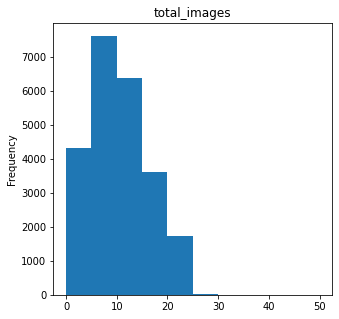

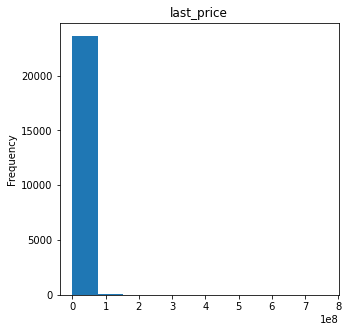

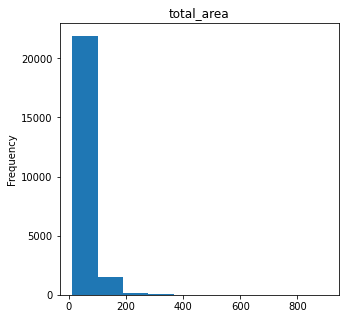

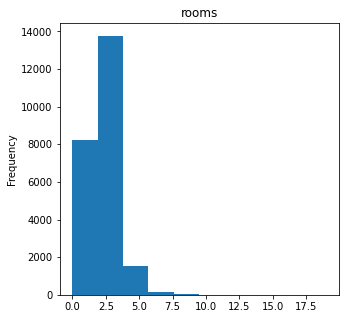

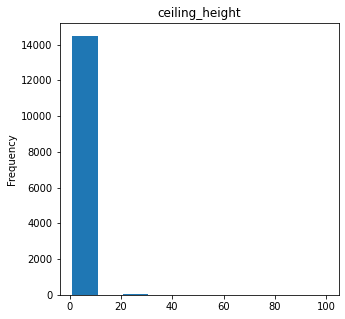

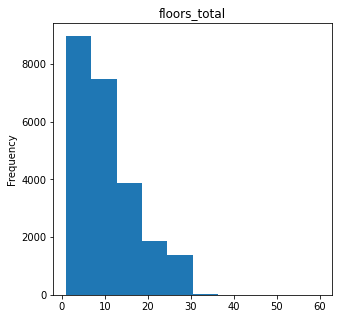

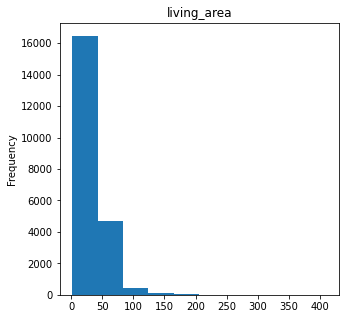

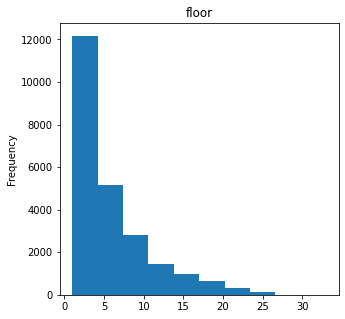

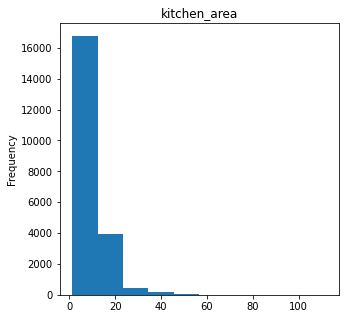

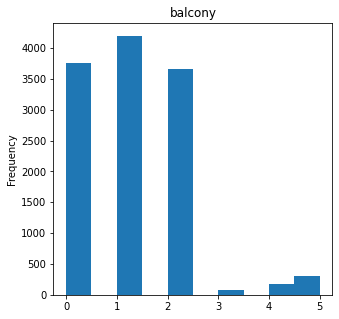

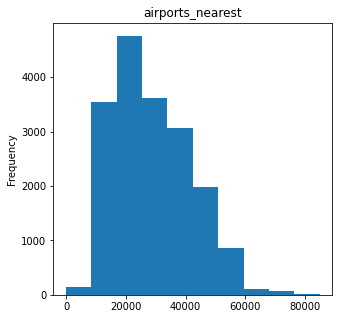

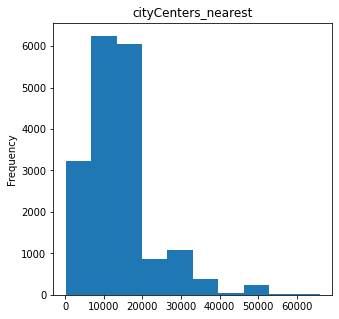

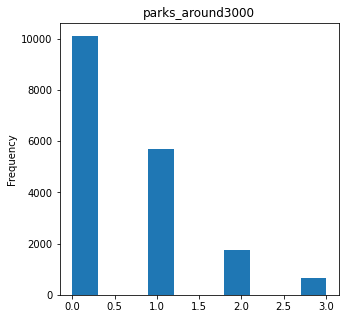

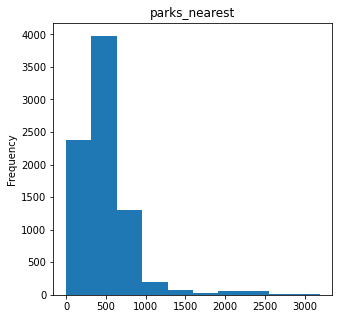

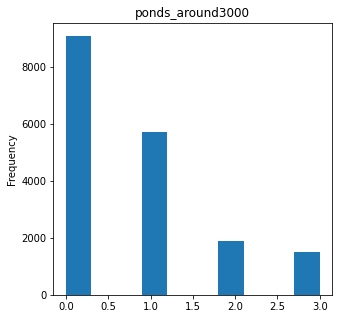

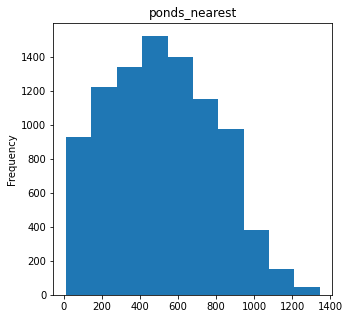

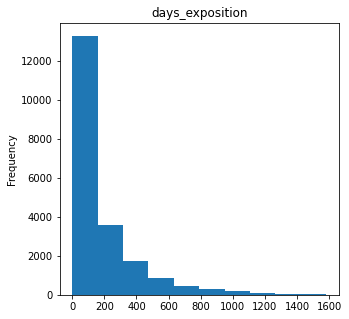

In [5]:
#для поиска числовых значений вызовем метод select_dtypes библиотеки numpy, пройдемся циклом по столбцам и строим гистограмму  
data_numeric = data.select_dtypes(include=np.number)
for col in data_numeric :
    data_numeric [col].plot(title=col, kind ='hist',figsize=(5, 5))
    plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%"> 
    
💬 <br>1.В данных много столбцов с пропущенными данными. Для анализа данных ключевые из них:
    <br>balcony                 11519
    <br>ceiling_height           9195
    <br>cityCenters_nearest      5519
    <br>days_exposition          3181
    <br>kitchen_area             2278
    <br>living_area              1903
    <br>floors_total               86
    <br>locality_name              49
    <br>Часть из них можно заменить, часть оставить либо переименовать как неизвестное значение (в случае с locality_name)
    <br>2. first_day_exposition  имеет формат Object, очевидно далжен быть формат даты. Такие данные как количество балконов, этажей могут быть целочисленными
    <br>3. Столбцы last_price, total_area, rooms, living_area, kitchen_area содержат явные выбросы и аномалии, а в значениях ceiling_height вероятны ошибки.  
      


In [6]:
data_rooms = data[data['rooms'] > 4]
data_rooms.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,NaN,5.0,104.0,4,NaN,False,False,17.0,NaN,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.0,2,NaN,False,False,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
106,9,10500000.0,124.1,2017-05-25T00:00:00,5,3.20,4.0,79.4,3,NaN,False,False,20.0,0.0,Санкт-Петербург,26825.0,5527.0,1.0,384.0,0.0,NaN,6.0
147,10,27700000.0,179.6,2017-07-06T00:00:00,5,2.85,25.0,97.2,25,NaN,False,False,33.8,2.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,75.0
201,5,10880000.0,123.1,2015-11-12T00:00:00,6,3.20,5.0,89.0,2,NaN,False,False,11.0,NaN,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992.0
335,1,21800000.0,163.4,2017-12-10T00:00:00,5,3.50,5.0,119.5,2,False,False,False,10.0,NaN,Санкт-Петербург,26791.0,5493.0,1.0,349.0,0.0,NaN,106.0
417,5,14200000.0,178.0,2017-10-26T00:00:00,5,3.30,4.0,126.6,2,NaN,False,False,19.4,NaN,Санкт-Петербург,24287.0,2835.0,0.0,NaN,3.0,257.0,104.0
458,9,4200000.0,106.0,2018-10-05T00:00:00,5,NaN,5.0,75.8,1,NaN,False,False,12.0,NaN,посёлок городского типа Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
495,1,10400000.0,104.0,2015-09-20T00:00:00,5,3.50,6.0,70.0,4,NaN,False,False,14.0,0.0,Санкт-Петербург,21773.0,2074.0,1.0,637.0,1.0,145.0,702.0


### Предобработка данных

In [7]:
# заменим прорпуски в столбцах, где это имеет смысл:

data['is_apartment'] = data['is_apartment'].fillna(False) #булево значение
data['locality_name'] = data['locality_name'].fillna('Unknown') #заменить название нечем,кроме категории "неизвестен"

# пропуски в количестве балконов можно заполнить средним значением для квартир с аналоичным количеством комнат
# не факт, что пропуск означает отсутствие балкона вообще, заменять на 0 некорректно

for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['balcony'].isna()), 'balcony'] = \
    data.loc[(data['rooms'] == d),'balcony'].mean()
    
#пропуск в названии населенног пункта заменить нечем, подставляем Unknown
data['locality_name'] = data['locality_name'].fillna('Unknown')

#для floors_total заменой может быть медиана этажности в населенном пункте

for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == d),'floors_total'].median() 

# аналогично для заполнения пропусков площади кухни и общей жилой площади    

for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == d),'kitchen_area'].mean() 
    
for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == d),'living_area'].mean()

# пропуски в высоте потолков логично было бы заменить на среднее среди объектов аналогичной этажности

for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == d),'ceiling_height'].mean()     

# проверим пропуски еще раз    
data.info()
data.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23578 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23694 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area              197
ceiling_height            121
balcony                     5
locality_name               0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [8]:
#Оставшиеся 5 пропусков в balcony могут быть для числа комнат, где нет данных по балконам
#заменим на 0. 
data['balcony'] = data['balcony'].fillna(0)

#оставшуюся строку в ceiling_height можно объяснить отсутствием данных для конкретной этажности, заменим медианой.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#аналогично для kitchen_area              
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

# проверим пропуски еще раз    
data.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
last_price                  0
locality_name               0
balcony                     0
kitchen_area                0
total_images                0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Остались пропуски в некритичных для анализа данных: близость до парков и водоемов, до центра. 
Пропуски в days_exposition могут означать,что объявление еще активно.

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Даты публикаций имеют формат object, что затруднит обработку данных. Переводим в формат даты методом to_datetime()

Число балконов вряд ли может быть дробным, как и количество этажей, переводим в целочисленный формат методом astype().


In [9]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.00000,1,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.644470,11,18.600000,1,False,False,False,11.00000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.803709,5,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.803709,14,47.387941,9,False,False,False,11.30858,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.00000,1,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [10]:
#удалим неявные дубликаты в locality_name
#выведем на экран отсортированные уникальные значения столбца

sorted(data['locality_name'].unique())


['Unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

In [11]:
#для замены дубликатов достаточно привести к единому написанию тип поселений

duplicates = ['поселок городского типа', 'посёлок городского типа', 'городской поселок', 'посёлок'] 
name = 'поселок'
for el in duplicates:
    data['locality_name'] = data['locality_name'].str.replace(el, name)

print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0        2.700000            16    51.000000      8         False   False   
1        2.644470            11    18.600000      1         False   False   
2        2.803709             5    34.300000      4         False   False   
3        2.803709            14    47.387941      9         False   False   
4        3.030000            14    32.000000     13         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False      25.00000        1 

In [12]:
#рассмотрим аномалии и выбросы в данных
#выведем основные показатели по столбцам

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771479,10.670028,34.441157,5.892358,10.558439,1.064180,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.009358,6.587831,21.802121,4.885249,5.642888,0.781176,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.400000,1.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.724262,9.000000,30.300000,4.000000,9.550118,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.803709,16.000000,42.700000,8.000000,11.600000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<AxesSubplot:>

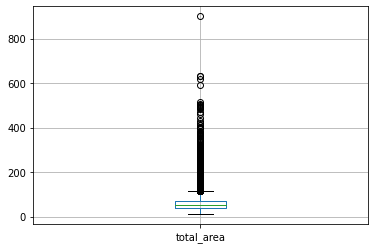

In [13]:
#рассмотрим диаграммы размаха для столбцов total_area, rooms, ceiling_height, living_area, kitchen_area, days_exposition

data.boxplot('total_area')

<AxesSubplot:>

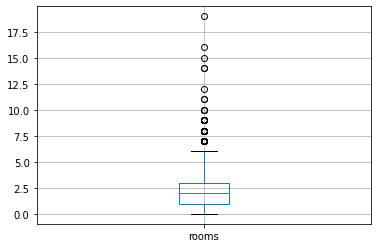

In [14]:
data.boxplot('rooms') 

<AxesSubplot:>

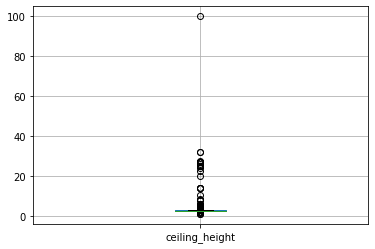

In [15]:
data.boxplot('ceiling_height')

<AxesSubplot:>

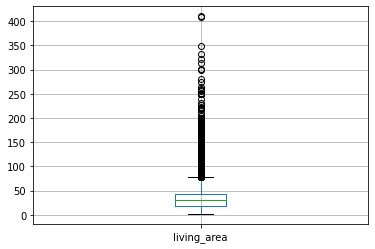

In [16]:
data.boxplot('living_area') 

<AxesSubplot:>

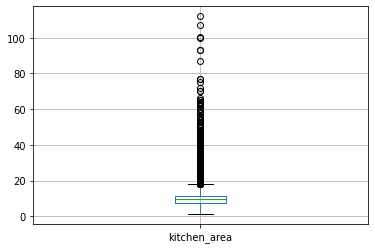

In [17]:
data.boxplot('kitchen_area') 

<AxesSubplot:>

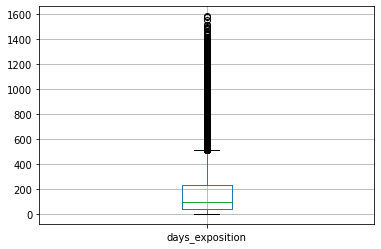

In [18]:
data.boxplot('days_exposition') 

<AxesSubplot:>

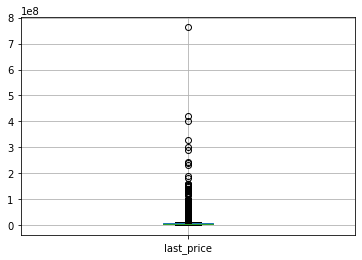

In [19]:
data.boxplot('last_price') 

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Видны аномалии и выбросы в столбцах.
По данным гистограмм, диаграмм размаха и таблицы describe можно сделать выводы:
    
- в столбце total_area,living_area, kitchen_area можно ограничить данные максимальными значениями до 250 кв м, 175 кв м и 40 кв м. 
- в столбце rooms можно ограничить данные максимальными значениями до 10 комнат
- в last_price тоже есть выбросы: цены выше 30 млн лучше отбросить
- в данных столбца ceiling_height явная ошибка данных и аномальные значения стоит заменить корректными данными

In [31]:
#для начала разберемся что там с потолками))
ceiling = data['ceiling_height'].sort_values(ascending=False).unique()
#допустим, что в значениях 27,5, 32 и 100 кто-то пропустил запятую.
#Но потолки в 1, 14 и 20 метров выглядят также неубедительно, и запятая здесь не поможет. Попробуем отбросить лишние данные.

(0.0, 10.0)

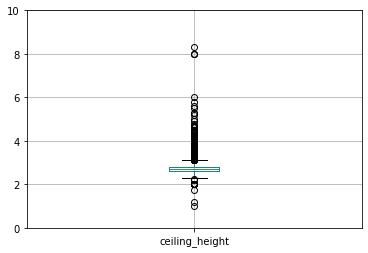

In [22]:
#ограничим масштаб диаграммы рзброса значением 10

import matplotlib.pyplot as plt 
data.boxplot('ceiling_height')
plt.ylim(0, 10)


In [ ]:
#оставим реалистичные данные с учетом данных диаграммы разброса
data_filtered_ceiling = data[(data['ceiling_height'] >= 1.75)\
                     & (data['ceiling_height'] < 5)]

#посмотрим, много ли данных отфильтровано
data.shape[0]/data_filtered_ceiling.shape[0] # 0,2% выглядит небольшой потерей

In [ ]:
#Разберемся с ценой. Выбросы можно отфильтровать, т к заменить их будет неверно:
#получим изначально дорогие квартиры по заниженной цене и наоборот

sorted(data['last_price'].unique()) #жилплощадь за 12190.0 вероятно хотели сдать в аренду, но разместили не в том разделе.
#отбросим это значение при фильтрации


In [ ]:
#ограничим диаграмму размаха значениями от 400 000 до 50 000 000
 
data.boxplot('last_price')
plt.ylim(400000, 50000000)

In [ ]:
#отфильтруем данные с учетом данных диаграммы размаха
data_filtered_price = data_filtered_ceiling[(data_filtered_ceiling['last_price'] >= 400000)\
                     & (data_filtered_ceiling['last_price'] < 30000000)]

#посмотрим, много ли данных отфильтровали
data.shape[0]/data_filtered_price.shape[0] # 1,56%

In [ ]:
#далее отфильтруем выбросы по количеству комнат и площадям
data_final = data_filtered_price[(data_filtered_price['rooms'] <= 10)\
                                          & (data_filtered_price['total_area'] < 250)\
                                          & (data_filtered_price['living_area'] < 175)\
                                          & (data_filtered_price['kitchen_area'] < 40)]\

data_final = data_final.reset_index() #убираем привязку нового датафрейма к предыдущему                                         

#посмотрим, много ли данных отфильтровали
data.shape[0]/data_final.shape[0] # 2,97%

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Осталось разобраться с days_exposition. Распределение на гистограмме и диаграмме показывает, что есть выбросы с периодом по несколько лет. Их можно отбросить. Пропуски оставляем, т к они могут говорить о том, что объявление еще актуально.


In [ ]:
#для ненулевых значений days_exposition ограничим данные 1000 днями

data_final = data_final.query('days_exposition < 1000 | days_exposition.isnull()', engine='python')
data.shape[0]/data_final.shape[0] #потеря данных после фильтрации составила 3%, что в пределах допустимого.

Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
#добавим данные о цене за кв метр, а также о дне недели, месяце и годе публикации:

data_final['price_m'] = data_final['last_price']/data_filtered_price['total_area']
data_final['weekday'] = data_final['first_day_exposition'].dt.weekday
data_final['month'] = data_final['first_day_exposition'].dt.month
data_final['year'] = data_final['first_day_exposition'].dt.year

#для определения типа этажа воспользуемся собственной функцией:
def floor_type(row):
    if row["floor"] ==  row["floors_total"]:
        return "«последний»"
    elif row["floor"] == 1:
        return "первый"
    else:
        return "другой"

data_final['floor_type'] = data_final[['floor', 'floors_total']].apply(floor_type, axis=1)

#добавим данные о расстоянии до центра города в км и округлим до целого
data_final['downtown_km'] = data_final['cityCenters_nearest'] / 1000
data_final['downtown_km'] = data_final['downtown_km'].round(0)

data_final.head()



<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 В данных, которые добавляют пользователи, чаще содержатся ошибки. 
<br>В данных достаточно много выбросов: объектов с большой площадью и высокой стоимостью. 
<br>Т к цель исследования - изучить особенности и закономерности рынка в целом, 
можем брать в расчет значения, приближенные к типичным, а пропуски заменить средними или медианными значениями

### Проведите исследовательский анализ данных

In [ ]:
data_final_numeric = data_final.select_dtypes(include=np.number)
for col in data_final_numeric:
    data_final_numeric [col].plot(title=col, kind ='hist',figsize=(5, 5))
    plt.show()

In [ ]:
ax = data_final['floor_type'].value_counts().plot.bar(title='floor_type', rot=45)
ax.set(xlabel='Тип этажа объекта', ylabel='Количество объектов с таким этажом')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 по графикам можно сделать следующие предварительные выводы:
    <br>- объекты в своей основной массе стоят в пределах 10 млн руб;
    <br>- наибольшая часть предложений по общей площади не превышают 100 кв м
    <br>- больше всего предложений в категории однокомнатные квартиры, чуть меньше в категории двухкомнатные. Количество предложений в прямой корреляции с количеством комнат. Меньше всего предложений от 6 комнат и выше
    <br>- абсолютное большинство объектов имеют стандартную высоту потолков до 3 м
    <br>- этажность зданий объектов в прямой зависимости от их количества. Абсолютное большинство предложений в домах до 10 этажей, однако значимые доли занимают дома до 15, 20 и 30 этажей. Логично, что и количество предложений на кокретном этаже имеет такю же корреляцию
    <br>- На последних или первых этажах находится примерно по 15% всех объектов, подавляющее же большинство располагаются на других этажах
    <br>- жилая площадь объектов в общей массе колеблется в пределах 50 кв м. Однако немало предложений и с площадью до 100 кв м
    <br>- площадь кухни в подавляющем большинстве предложений до 15 кв м. Наибольшая доля объектов с очень компактными кухнями: до 10 кв м. Однако есть из чего выбрать и в категориях с кухнями до 30 кв м
    <br>- абсолютное большинство публикаций имеют срок до 300 дней
    <br>- пользователи предпочитают публиковать предложения по будним дням. Активность в первый и последний месяцы года заметно возрастает
    <br>- видна положительная динамика в количестве объектов в сервисе Яндекс.Недвижимость. Небольшой объем в 2019 г возможно объясняется тем, что архив захватил только часть года
    <br>- наибольшая часть объектов имеет удаленность от центра города от 10 до 20 км
    

In [ ]:
#Изучим подробнее first_day_exposition

day_mean = data_final['days_exposition'].mean()
day_med = data_final['days_exposition'].median()
day_mean, day_med

In [ ]:
data_final['days_exposition'].plot(title='days_exposition', kind ='hist',figsize=(5, 5))


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Количество публикаций обратно пропорционально длительности размещения. 
<br>Половина объектов продается за период до 92 дней. А среднее составляет 166 дней. Значительные доли имеют периоды до 600 дней. И есть единичные случаи, когда объекты продаются по несколько лет

In [ ]:
#для выбранных столбцов построимм диаграммы рассеяния

series_scatter  = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'weekday','month','year'] 
for col in series_scatter:
    data_final.pivot_table(index=col,values='last_price').reset_index().plot(x=col, y='last_price', kind='scatter')
    plt.show()


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Какие факторы наиболее сильно влияют на стоимость недвижимости?    
    <br>- очевидна прямая взаимосвязь между общей и жилой площадью, площадью кухни объекта и его стоимостью. Однако стоит сказать, что с увеличением стоимости объекта эта корреляция становится слабее
    <br>- также стоимость напрямую обусловлена количеством комнат: больше комнат - дороже объект
    <br>- этаж имеет влияние на цену объекта, хотя и не слишком сильное. Выше этаж, выше стоимость. 
    <br>- расмотрим дату публикации: объявления, размещенные в выходные, имеют более низкую цену. Месяц размещения, судя по диаграмме, не сильно влияет на стоимость. Есть влияние года размещения: в течение периода стоимость постепенно снижалась, небольшой рост в 2019 г.

In [ ]:
#выясним, в каких населенных пунктах наибольшая цена кв м
#отфильтруем 10 городов с наибольшим количеством объектов в продаже

data_10 = data_final.pivot_table(index='locality_name',values='last_price',aggfunc='count')\
.sort_values(by='last_price',ascending=False).head(10)

#выведем из основных данных среднюю стоимость кв м по этим городам через объединение полученных таблиц
data_10.merge(data_final.pivot_table(index='locality_name',values='price_m'),on = 'locality_name')\
.sort_values(by='price_m',ascending=False)


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Ожидаемо, возглавляет список Санкт-Петербург, далее исторический пригород Пушкин и поселки Парголово и Кудрово. Из 10 самых популярных на сервисе Яндекс поселений, наименьшая стоимость кв м в Мурино, Гатчине и Выборге.

In [ ]:
#отфильтруем данные по Санкт-Петербургу и посчитаем среднюю стоимость км от центра

data_spb = data_final[data_final['locality_name'] =='Санкт-Петербург']
data_spb_pivot = data_spb.pivot_table(index='downtown_km',values='last_price')

In [ ]:
#для наглядности отобразим данные на гистограмме

data_spb_pivot.plot(title='data_spb', kind ='bar',figsize=(10,5))

In [ ]:
#стоимость на 27 км выглядит как аномалия. Рассмотрим подробнее:

data_spb = data_spb.pivot_table(index='downtown_km')
data_spb

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Гистограмма стоимости км расстояния до центра показывает, что цена снижается по мере удаленности объекта от центра города. Вероятно, граница центральной части города около 9 км.
Рост стоимости объектов на 27 км объясняется тем, что в этом районе преимущественно малоэтажная застройка. Очевидно, там располагается поселок таунхаусов или дома повышенной комфортности. Об этом говорят средние показатели этажности: 3,5 и этажа объекта: 2,5.  

### Общий вывод

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 По итогам исследования объектов в базе Яндекс.недвижимость сделаны выводы:

- бОльшая часть объектов стоят в пределах 10 млн руб;
- по стоимости кв м лидирует Санкт-Петербург, далее исторический пригород Пушкин и поселки Парголово и Кудрово. Из 10 самых популярных на сервисе Яндекс поселений, наименьшая стоимость кв м в Мурино, Гатчине и Выборге.
- наибольшая часть объектов имеет удаленность от центра города от 10 до 20 км. Цена кв м объектов снижается по мере удаленности объекта от центра города. Исключение составляет малоэтажная застройка на 27 км от центра Санкт-Петербурга.
- больше всего предложений в категориях однокомнатные и двухкомнатные квартиры. Чем больше количество комнат, тем меньше предложений в данной категории.
- Типичная этажность зданий объектов - до 10 этажей, однако значимые доли занимают дома до 15, 20 и 30 этажей. Чем выше этажность и сам этаж объекта, тем меньше предложений в категории.На последних или первых этажах находится примерно по 15% всех объектов, подавляющее же большинство располагаются на других этажах. 
- абсолютное большинство объектов имеют стандартную высоту потолков до 3 м.
- наибольшая часть предложений по общей площади не превышают 100 кв м, жилая площадь объектов в общей массе колеблется в пределах 50 кв м. Однако значительные доля категории с площадью до 100 кв м
- площадь кухни в подавляющем большинстве предложений до 15 кв м. Наибольшая доля объектов с очень компактными кухнями: до 10 кв м.
- в целом чем больше общая, жилая или площадь кухни, тем меньше объектов в категории.
- абсолютное большинство публикаций имеют срок до 300 дней. Количество публикаций обратно пропорционально длительности размещения. Половина объектов продается за период до 92 дней. А среднее составляет 166 дней. Значительные доли имеют периоды до 600 дней. И есть единичные случаи, когда объекты продаются по несколько лет
- пользователи предпочитают публиковать предложения по будним дням. Активность в первый и последний месяцы года заметно возрастает
- объявления, размещенные в выходные, имеют более низкую цену. Месяц размещения не сильно влияет на стоимость. Есть влияние года размещения: в течение периода стоимость постепенно снижалась, небольшой рост в 2019 г.
- в количестве объектов в сервисе Яндекс.Недвижимость видна положительная динамика по годам. Небольшой объем в 2019 г возможно объясняется тем, что архив захватил только часть года
